<a href="https://colab.research.google.com/github/HelmyPrakoso/Datamining/blob/main/W6W7W8_Helmy_Prakoso_Intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup Library and Datasets
---

## Import the library

In [70]:
!pip install kmodes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from kmodes.kprototypes import KPrototypes


## Import the datasets

In [6]:
sheet_url_1='https://drive.google.com/file/d/1R9g5f310AA1Zmrnmd8P8jclnyToN54Bx/view'
sheet_url_1='https://drive.google.com/uc?id=' + sheet_url_1.split('/')[-2]
orders_ds= pd.read_csv(sheet_url_1)
orders_ds.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
sheet_url_2='https://drive.google.com/file/d/1S_BzA_P4v26oIvErtB4Ta64fQB53Hw1_/view'
sheet_url_2='https://drive.google.com/uc?id=' + sheet_url_2.split('/')[-2]
customers_ds= pd.read_csv(sheet_url_2)
customers_ds.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
sheet_url_3='https://drive.google.com/file/d/1JBzMoiRBy6YsxHoS3OhysRcZZyRh5DQD/view'
sheet_url_3='https://drive.google.com/uc?id=' + sheet_url_3.split('/')[-2]
order_payments_ds= pd.read_csv(sheet_url_3)
order_payments_ds.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


# Cleaning The Datasets

Cleaning in each Datasets just contain drop column yang mana tidak ada hubungannya terkait datasets, menambahkan column untuk analisa, mengubah type dari variabel, dan melakukan aggregat di datasets order payments 

## Cleaning Orders Datasets (orders)

hal cleaning yang dilakukan antara lain 
* Drop column yang tidak terpakai
* Convert data type
* add new column **order_actual_time**

\begin{align}
        \text{order actual time} = \text{order delivered customer date} - 
        \text{order approved at}
\end{align}

-----

Check column name and data type

In [9]:
orders_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


drop column order_delivered_carrier_date and order_estimated_delivery_date

In [10]:
orders_ds.drop(columns=['order_delivered_carrier_date','order_estimated_delivery_date'],inplace=True)
orders_ds.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02


then change data type of several variables into date and datetime

* order_purchase_timestamp
* order_approved_at 
* order_delivered_customer_date



In [11]:
from datetime import datetime
from datetime import timedelta
from datetime import date

In [12]:
order=orders_ds.copy()
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02


In [13]:
order['order_purchase_timestamp']=pd.to_datetime(order['order_purchase_timestamp'])
order['order_approved_at']=pd.to_datetime(order['order_approved_at'])
order['order_delivered_customer_date']=pd.to_datetime(order['order_delivered_customer_date'])
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_customer_date  96476 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 4.6+ MB


In [14]:
order['order_actual_time(days)']=order['order_delivered_customer_date']-order['order_approved_at']
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       99441 non-null  object         
 1   customer_id                    99441 non-null  object         
 2   order_status                   99441 non-null  object         
 3   order_purchase_timestamp       99441 non-null  datetime64[ns] 
 4   order_approved_at              99281 non-null  datetime64[ns] 
 5   order_delivered_customer_date  96476 non-null  datetime64[ns] 
 6   order_actual_time(days)        96462 non-null  timedelta64[ns]
dtypes: datetime64[ns](3), object(3), timedelta64[ns](1)
memory usage: 5.3+ MB


In [15]:
order['order_actual_time(days)']=order['order_actual_time(days)'].dt.days+(order['order_actual_time(days)'].dt.seconds)/(24*3600)

drop the order_approved_at and order_delivered_customer_date

In [16]:
order.drop(columns=['order_approved_at','order_delivered_customer_date'],inplace=True)
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_actual_time(days)
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,8.429144
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,12.502292
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,9.382708
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,13.196331
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2.830938


## Cleaning Customers datasets (customers)
hal cleaning yang dilakukan yaitu:

* Drop column yang tidak terpakai

In [17]:
customers_ds.info()
customers=customers_ds.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


drop column customer_zip_code_prefix

In [18]:
customers.drop(columns=['customer_zip_code_prefix'],inplace=True)
customers.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP


## Cleaning Order Payments Datasets (order_payments_agg)
hal cleaning yang dilakukan yaitu:

* Melakukan Aggregasi terhadap order_id yang sama 
  
  sehingga diperoleh maximum order payment, total payment value, dan jenis payment type 
* Drop column yang tidak terpakai

----

In [19]:
order_payments_ds.info()
order_payments=order_payments_ds.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Check order_id which has payment sequential more than once

In [20]:
d=order_payments.loc[order_payments['order_id']=='009ac365164f8e06f59d18a08045f6c4']
d

,order_id,payment_sequential,payment_type,payment_installments,payment_value
285,009ac365164f8e06f59d18a08045f6c4,5,voucher,1,8.75
15298,009ac365164f8e06f59d18a08045f6c4,6,voucher,1,4.17
16053,009ac365164f8e06f59d18a08045f6c4,1,credit_card,1,0.88
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.50
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45
73837,009ac365164f8e06f59d18a08045f6c4,3,voucher,1,8.25


In [21]:
c=d.groupby('order_id').agg(total_payment_sequential=('payment_sequential','max'),
                            total_payment_value=('payment_value','sum'),
                            payment_type=('payment_type',lambda x: ','.join(sorted(pd.Series.unique(x)))))
c

,total_payment_sequential,total_payment_value,payment_type
order_id,,,
009ac365164f8e06f59d18a08045f6c4,6,32.0,"credit_card,voucher"


aggregated all the order_id

In [22]:
order_payments_agg=order_payments.groupby('order_id').agg(total_payment_sequential=('payment_sequential','max'),
                                                          total_payment_value=('payment_value','sum'),
                                                          payment_type=('payment_type',lambda x: ','.join(sorted(pd.Series.unique(x)))))
order_payments_agg

,total_payment_sequential,total_payment_value,payment_type
order_id,,,
00010242fe8c5a6d1ba2dd792cb16214,1,72.19,credit_card
00018f77f2f0320c557190d7a144bdd3,1,259.83,credit_card
000229ec398224ef6ca0657da4fc703e,1,216.87,credit_card
00024acbcdf0a6daa1e931b038114c75,1,25.78,credit_card
00042b26cf59d7ce69dfabb4e55b4fd9,1,218.04,credit_card
...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,343.40,boleto
fffcd46ef2263f404302a634eb57f7eb,1,386.53,boleto
fffce4705a9662cd70adb13d4a31832d,1,116.85,credit_card


# Combine The Datasets

in this section, the datasets will be joinned, drop unused columns and check the null values in each column

In [23]:
combined=pd.merge(order,customers,how='left',on="customer_id")
combined=pd.merge(combined,order_payments_agg,how='left',on='order_id')
combined

,order_id,customer_id,order_status,order_purchase_timestamp,order_actual_time(days),customer_unique_id,customer_city,customer_state,total_payment_sequential,total_payment_value,payment_type
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,8.429144,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3.0,38.71,"credit_card,voucher"
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,12.502292,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,141.46,boleto
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,9.382708,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,179.12,credit_card
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,13.196331,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,72.20,credit_card
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2.830938,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,28.62,credit_card
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,8.218009,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,1.0,85.08,credit_card
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,22.185637,da62f9e57a76d978d02ab5362c509660,praia grande,SP,1.0,195.00,credit_card
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,24.847234,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,1.0,271.01,credit_card
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,17.080938,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,1.0,441.16,credit_card


In [24]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
 4   order_actual_time(days)   96462 non-null  float64       
 5   customer_unique_id        99441 non-null  object        
 6   customer_city             99441 non-null  object        
 7   customer_state            99441 non-null  object        
 8   total_payment_sequential  99440 non-null  float64       
 9   total_payment_value       99440 non-null  float64       
 10  payment_type              99440 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 9.1+ MB


drop the duplicate value

In [25]:
combined.drop_duplicates(inplace=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
 4   order_actual_time(days)   96462 non-null  float64       
 5   customer_unique_id        99441 non-null  object        
 6   customer_city             99441 non-null  object        
 7   customer_state            99441 non-null  object        
 8   total_payment_sequential  99440 non-null  float64       
 9   total_payment_value       99440 non-null  float64       
 10  payment_type              99440 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 9.1+ MB


Check Null values

In [26]:
combined.isna().sum()

order_id                       0
customer_id                    0
order_status                   0
order_purchase_timestamp       0
order_actual_time(days)     2979
customer_unique_id             0
customer_city                  0
customer_state                 0
total_payment_sequential       1
total_payment_value            1
payment_type                   1
dtype: int64

Check why there's null value in actual time

In [27]:
combined[combined['order_actual_time(days)'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_actual_time(days),customer_unique_id,customer_city,customer_state,total_payment_sequential,total_payment_value,payment_type
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,NaN,36edbb3fb164b1f16485364b6fb04c73,santa rosa,RS,1.0,65.95,credit_card
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,NaN,08fb46d35bb3ab4037202c23592d1259,jundiai,SP,1.0,22.36,boleto
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,NaN,c7f8d7b1fffc946d7069574f74c39f4e,santo amaro da imperatriz,SC,1.0,50.35,boleto
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,NaN,9f269af9c49244f6ba4a46985a3cfc2e,sao paulo,SP,1.0,138.28,credit_card
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,NaN,528b011eb7fab3d59c336cc7248eed3a,paracatu,MG,1.0,69.12,boleto
...,...,...,...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,e90598185d2427a35e32ef241a5c04aa,santos,SP,1.0,63.89,voucher
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,NaN,965191786b70912f793e4a777fd623cd,campinas,SP,1.0,144.56,boleto
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,d05c44a138277ad325d915c6b7ccbcdf,sao paulo,SP,1.0,107.13,voucher
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,NaN,e72a90a2b29fe1a8795b284aaaa3246f,rio de janeiro,RJ,1.0,195.91,credit_card


unique order_status

In [28]:
combined[combined.isnull().any(axis=1)]['order_status'].unique()

array(['invoiced', 'shipped', 'processing', 'unavailable', 'canceled',
       'delivered', 'created', 'approved'], dtype=object)

and check NA Value in payment

In [29]:
combined[combined['total_payment_sequential'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_actual_time(days),customer_unique_id,customer_city,customer_state,total_payment_sequential,total_payment_value,payment_type
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,54.813194,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,SP,NaN,NaN,NaN


due to delivered and without payment data, so the row must be droped

In [30]:
combined.dropna(subset=['total_payment_sequential'],inplace=True)
combined.isnull().sum()

order_id                       0
customer_id                    0
order_status                   0
order_purchase_timestamp       0
order_actual_time(days)     2979
customer_unique_id             0
customer_city                  0
customer_state                 0
total_payment_sequential       0
total_payment_value            0
payment_type                   0
dtype: int64

drop columns order_id and customer_id

# Handling the combined datasets
in this section, the datasets will be check the outlier and remove outlier

check the values in datasest

In [31]:
combined.describe()

,order_actual_time(days),total_payment_sequential,total_payment_value
count,96461.000000,99440.000000,99440.000000
mean,12.129915,1.045515,160.990267
std,9.515920,0.382177,221.951257
min,-6.989653,1.000000,0.000000
25%,6.309861,1.000000,62.010000
50%,9.852257,1.000000,105.290000
75%,15.141204,1.000000,176.970000
max,208.500972,29.000000,13664.080000


due to negative value in order actual time, so the row must be droped

In [32]:
combined=combined[combined['order_actual_time(days)']>=0]

check the outliers

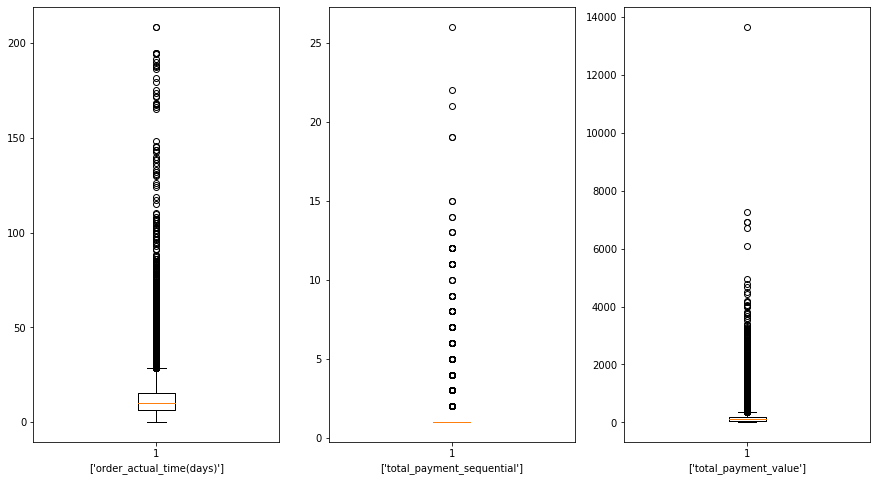

In [33]:
list_columns = combined.describe().columns.to_list()
fig, ax = plt.subplots(1,len(list_columns),figsize=(15,8))
outliers=[]
whisker=[]

for i in range (0,len(list_columns)):
  B= ax[i].boxplot(combined[list_columns[i]])
  ax[i].set_xlabel([list_columns[i]])
  out=[item.get_ydata() for item in B['fliers']]
  whis=[item.get_ydata() for item in B['whiskers']]
  outliers.append(out)
  whisker.append(whis)
plt.show()

how much outlier based on whisker boxplot

In [34]:
for i in range (0,len(list_columns)):
  out=len(outliers[i][0])
  total=len(combined[list_columns[i]])
  per=round(out/total*100,1)
  print('number outliers in',list_columns[i],'is',out,'from',total,'or',per,'% from total')

number outliers in order_actual_time(days) is 5072 from 96400 or 5.3 % from total
number outliers in total_payment_sequential is 2949 from 96400 or 3.1 % from total
number outliers in total_payment_value is 7574 from 96400 or 7.9 % from total


remove the outliers

In [35]:
for i in range (0,len(list_columns)):
  combined_c=combined.copy()
  combined_c=combined_c[~(combined_c[list_columns[i]]>max(whisker[i][1]))] #upper
  combined_c=combined_c[~(combined_c[list_columns[i]]<min(whisker[i][0]))] #lower

total data removed

In [36]:
len(combined)-len(combined_c)

7574

# Descriptive Statistics


in this section there's will be splited into two part, for numerical and non numerical data types

---


## Numerical data types

In [37]:
#define range function
def des_range(df):
  max=df.max()
  min=df.min()
  delta=max-min
  d=delta.to_frame().T
  d=d.rename(index={0:'range'})
  return d

#define cv function
def cv(df):
  d=df.std()/df.mean()
  d=d.to_frame().T
  d=d.rename(index={0:'cv'})
  return d

#define more detail describe function
def describe(df, statis):
  d=df.describe()
  if 'range' in statis:
    statis.remove('range')
    d=d.append(des_range(df))
  if 'mode' in statis:
    statis.remove('mode')
    w=df.agg(lambda x: stats.mode(x)[0])
    w.rename(index={0:'mode'},inplace=True)
    d=d.append(w)
    x=df.agg(lambda x: stats.mode(x)[1])
    x.rename(index={0:'count mode'},inplace=True)
    d=d.append(x)
  if 'cv' in statis:
    statis.remove('cv')
    d=d.append(cv(df))
  d=d.append(df.agg(statis))
  return d

In [38]:
describe(combined[list_columns], ['skew','var','kurt','range','cv','mode'])

,order_actual_time(days),total_payment_sequential,total_payment_value
count,96400.000000,96400.000000,96400.000000
mean,12.138620,1.045156,159.877424
std,9.512529,0.370664,218.852986
min,0.007662,1.000000,9.590000
25%,6.314867,1.000000,61.917500
50%,9.857222,1.000000,105.280000
75%,15.144913,1.000000,176.330000
max,208.500972,26.000000,13664.080000
range,208.493310,25.000000,13654.490000
mode,7.000012,1.000000,77.570000


pada datasets yang diberikan. terdapat beberapa insight yang menarik antara lain yaitu: 
1. payment sequential dari customer cenderung condong ke nilai yang kecil, hal ini bisa dilihat dari nilai skew yang positif, kurtosis yang positif, standar deviasi kecil, variance kecil, dan coefficient of variance (cv) yang kurang dari satu. Ditambah dengan nilai min,q1,median,q3 yang bernilai 1. Hal ini memberikan makna yang kuat bahwa mayoritas order hanya dilakukan dalam satu kali transaksi.

2. Hasil statistik deskriptif dari total_payment_value memberikan makna bahwa  total payment dari mayoritas order yang dilakukan tidak besar. hal ini dapat dilihat dari skew yang bernilai positif, yang mana cenderung berada di nilai yang kecil. Kemudian dari variasi nilai total payment relatif besar, karena terdapat beberapa order yang memiliki total payment yang besar. Hal ini bisa dilihat dari range atau simpangan dari min dan max. Akan tetapi variasi tersebut memiliki kecenderungan atau persebaran yang tidak luas, hal ini dapat dilihat dari nilai kurtosis yang positif dan tinggi.

3. Hal serupa juga terjadi pada order actual time, yang mana pengiriman tersebut tidak lama, akan tetapi tidak 75% dari semua order dikirim dalam jangka waktu kurang dari 15 hari. hal ini di dukung dengan coefficient of variance yang kurang dari 0, skew positif, kurt positif.

----
Customer unique id aggregated then return the descriptive statistics

In [39]:
temp=combined.groupby('customer_unique_id',as_index=False)[['customer_unique_id']].count()
describe(temp.iloc[1:],['skew','var','kurt','range','cv','mode'])

,customer_unique_id
count,93282.000000
mean,1.033415
std,0.209109
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000
range,14.000000
mode,1.000000


from table above, we can conclude the customer tendendcy to order once time, and then the highest customer order 15 times. the tendency of customer it can be seen from small value of cv, positive value of skew, positive value of kurtosis and small value of var and standar deviation

## Non Numerical data type

In [40]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96400 entries, 0 to 99440
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96400 non-null  object        
 1   customer_id               96400 non-null  object        
 2   order_status              96400 non-null  object        
 3   order_purchase_timestamp  96400 non-null  datetime64[ns]
 4   order_actual_time(days)   96400 non-null  float64       
 5   customer_unique_id        96400 non-null  object        
 6   customer_city             96400 non-null  object        
 7   customer_state            96400 non-null  object        
 8   total_payment_sequential  96400 non-null  float64       
 9   total_payment_value       96400 non-null  float64       
 10  payment_type              96400 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 8.8+ MB


In [41]:
combined[['order_status','customer_city','customer_state','payment_type']].describe()

,order_status,customer_city,customer_state,payment_type
count,96400,96400,96400,96400
unique,2,4085,27,6
top,delivered,sao paulo,SP,credit_card
freq,96394,15019,40436,72090


Kemudian untuk data type non numerical terdapat beberapa poin menarik, antara lain:
1. state yang sering melakukan pemesanan adalah state SP dengan jumlah order sebesar 40436.
2. kota yang sering melakukan pemesanan dalah kota sao paulo dengan jumlah order 15019.

# Visualize into Chart

1. Number of Orders per month
2. Daily Orders Trend
3. Percentage of orders per payment type 



## Number of Order Per Month

In [42]:
order_purchase=combined[['order_purchase_timestamp']].copy()
order_purchase['year-month']=order_purchase['order_purchase_timestamp'].dt.strftime('%Y-%m')
order_purchase.head()

,order_purchase_timestamp,year-month
0,2017-10-02 10:56:33,2017-10
1,2018-07-24 20:41:37,2018-07
2,2018-08-08 08:38:49,2018-08
3,2017-11-18 19:28:06,2017-11
4,2018-02-13 21:18:39,2018-02


In [43]:
tot_order_month=order_purchase.groupby(['year-month'],as_index=False).count()
tot_order_month.head()

,year-month,order_purchase_timestamp
0,2016-10,270
1,2016-12,1
2,2017-01,748
3,2017-02,1640
4,2017-03,2546


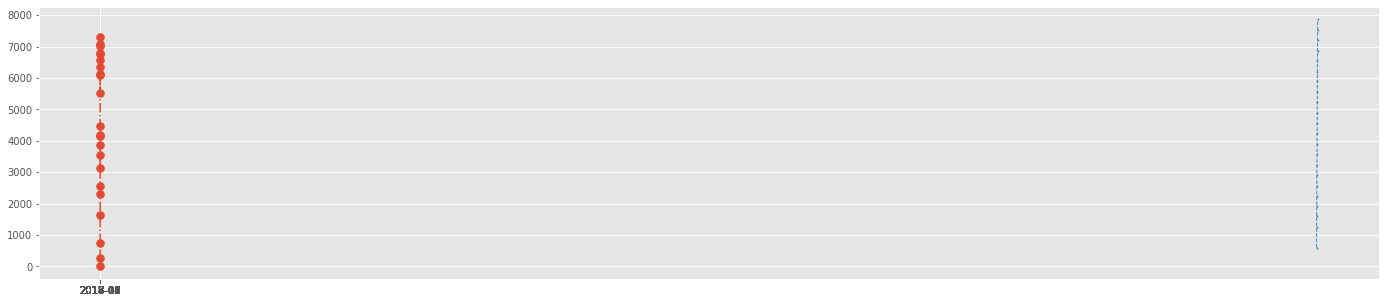

In [44]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(24,5))
x=tot_order_month['year-month']
y=tot_order_month['order_purchase_timestamp']
ax.plot(x,y,ls='-.',marker='.',ms=15)

#add trendline
tot_order_month['year-month']=pd.to_datetime(tot_order_month['year-month'])
x = mdates.date2num(tot_order_month['year-month'])
z = np.polyfit(x,y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "d--",lw=1,ms=1)

From chart above, the order each month are increasing and it can be concluded from the blue line as the trendline from number order per month

## Daily orders trend

In [45]:
daily=combined[['order_purchase_timestamp']].copy()
daily['date']=daily['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')
daily=daily.groupby(['date'],as_index=False).count()
daily.head()

,date,order_purchase_timestamp
0,2016-10-03,8
1,2016-10-04,54
2,2016-10-05,35
3,2016-10-06,41
4,2016-10-07,39


In [46]:
daily.tail()

,date,order_purchase_timestamp
606,2018-08-25,69
607,2018-08-26,73
608,2018-08-27,66
609,2018-08-28,39
610,2018-08-29,11


In [47]:
start_date=date(2016,10,3)
end_date=date(2018,8,29)
range_of_date=pd.date_range(start_date,end_date-timedelta(days=1),freq='d').to_frame(index=False,name='Date')
range_of_date['Date']=range_of_date['Date'].astype(str)
d=range_of_date.merge(daily,how='left',left_on='Date',right_on='date')
d.drop(columns='date',inplace=True)
daily_purchase=d.copy()

In [48]:
daily_purchase['Growth']=daily_purchase['order_purchase_timestamp'].pct_change()
daily_purchase.head()

,Date,order_purchase_timestamp,Growth
0,2016-10-03,8.0,NaN
1,2016-10-04,54.0,5.750000
2,2016-10-05,35.0,-0.351852
3,2016-10-06,41.0,0.171429
4,2016-10-07,39.0,-0.048780


In [49]:
daily_purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 0 to 694
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      695 non-null    object 
 1   order_purchase_timestamp  610 non-null    float64
 2   Growth                    694 non-null    float64
dtypes: float64(2), object(1)
memory usage: 21.7+ KB


In [50]:
daily_purchase['Date']=pd.to_datetime(daily_purchase['Date'])

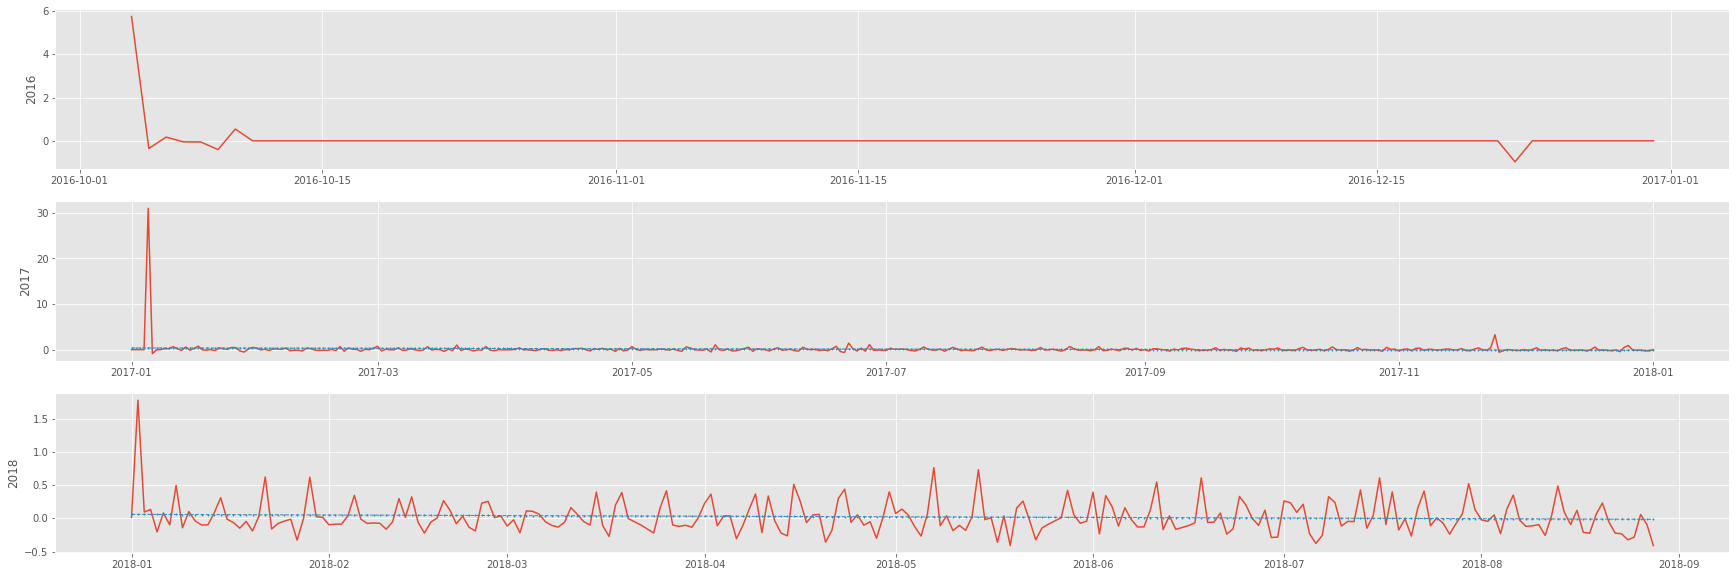

In [51]:
fig, ax = plt.subplots(3,figsize=(30,10))
start_date=pd.DataFrame({'date':[date(2016,1,1)]})
end_date=pd.DataFrame({'date':[date(2016,12,31)]})
start_date['date']=pd.to_datetime(start_date['date'])
end_date['date']=pd.to_datetime(end_date['date'])

for i in range (0,3):
   limit=(daily_purchase['Date']>=start_date['date'][0])&(daily_purchase['Date']<=end_date['date'][0])
   x=daily_purchase['Date'][limit]
   y=daily_purchase['Growth'][limit]
   ax[i].plot(x,y)
   ax[i].set_ylabel(start_date['date'].dt.year[0])
   #add trendline
   daily_purchase['Date']=pd.to_datetime(daily_purchase['Date'])
   x = mdates.date2num(daily_purchase['Date'][limit])
   z = np.polyfit(x,y, 1)
   p = np.poly1d(z)
   ax[i].plot(x, p(x), "d--",lw=1,ms=1)
   if start_date['date'].dt.is_leap_year[0]==True :
     delta=timedelta(days=366)
   else:
     delta=timedelta(days=365)
   start_date=start_date+delta
   end_date+=delta

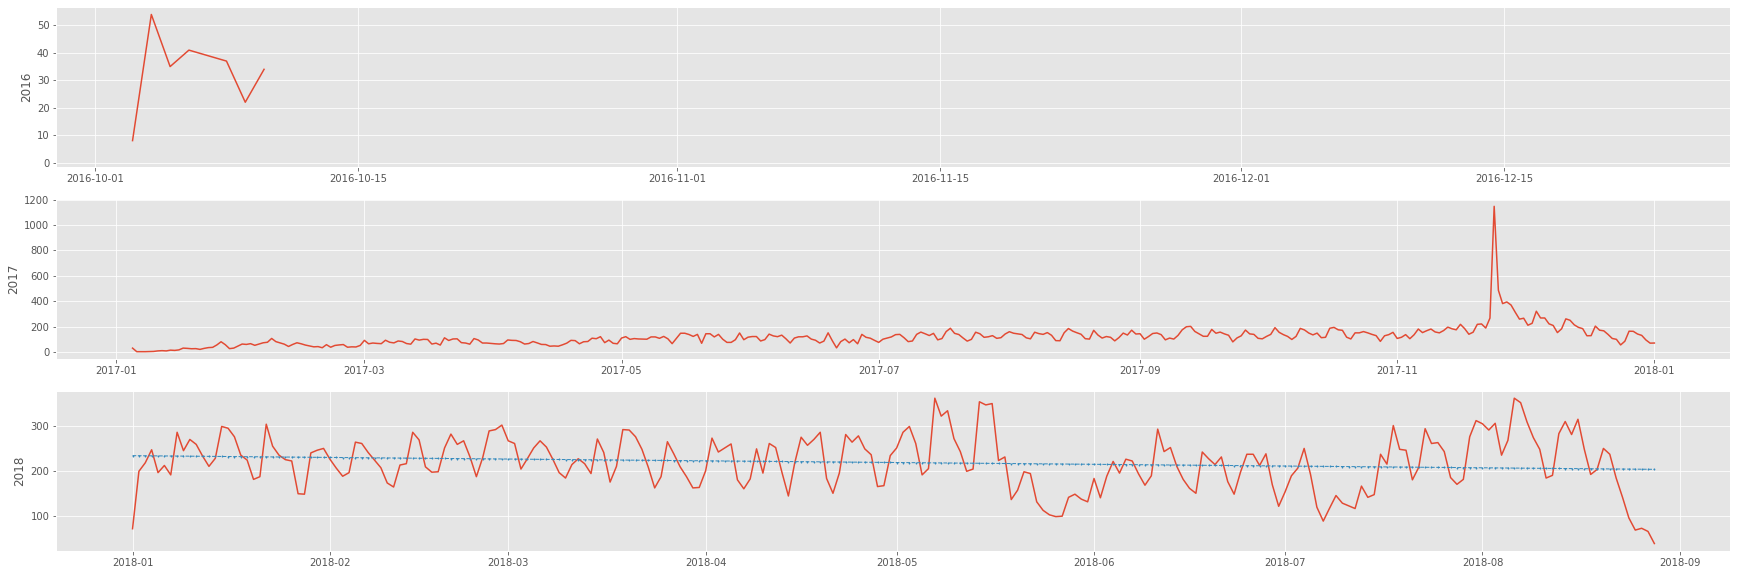

In [52]:
fig, ax = plt.subplots(3,figsize=(30,10))
start_date=pd.DataFrame({'date':[date(2016,1,1)]})
end_date=pd.DataFrame({'date':[date(2016,12,31)]})
start_date['date']=pd.to_datetime(start_date['date'])
end_date['date']=pd.to_datetime(end_date['date'])

for i in range (0,3):
   limit=(daily_purchase['Date']>=start_date['date'][0])&(daily_purchase['Date']<=end_date['date'][0])
   x=daily_purchase['Date'][limit]
   y=daily_purchase['order_purchase_timestamp'][limit]
   ax[i].plot(x,y)
   ax[i].set_ylabel(start_date['date'].dt.year[0])
   #add trendline
   daily_purchase['Date']=pd.to_datetime(daily_purchase['Date'])
   x = mdates.date2num(daily_purchase['Date'][limit])
   z = np.polyfit(x,y, 1)
   p = np.poly1d(z)
   ax[i].plot(x, p(x), "d--",lw=1,ms=1)
   if start_date['date'].dt.is_leap_year[0]==True :
     delta=timedelta(days=366)
   else:
     delta=timedelta(days=365)
   start_date=start_date+delta
   end_date+=delta

inspect growht more than 1

In [53]:
daily_purchase[daily_purchase['Growth']>=1]

,Date,order_purchase_timestamp,Growth
1,2016-10-04,54.0,5.750000
94,2017-01-05,32.0,31.000000
168,2017-03-20,113.0,1.017857
230,2017-05-21,145.0,1.071429
262,2017-06-22,83.0,1.441176
267,2017-06-27,140.0,1.121212
417,2017-11-24,1147.0,3.279851
456,2018-01-02,200.0,1.777778


inspecting growth 31% from 15 day earlier

In [54]:
idx = daily_purchase.index.get_loc(94)
daily_purchase.iloc[idx - 14 :idx+1]

,Date,order_purchase_timestamp,Growth
80,2016-12-22,NaN,0.000000
81,2016-12-23,1.0,-0.970588
82,2016-12-24,NaN,0.000000
83,2016-12-25,NaN,0.000000
84,2016-12-26,NaN,0.000000
85,2016-12-27,NaN,0.000000
86,2016-12-28,NaN,0.000000
87,2016-12-29,NaN,0.000000
88,2016-12-30,NaN,0.000000
89,2016-12-31,NaN,0.000000


then remove the growth more than 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

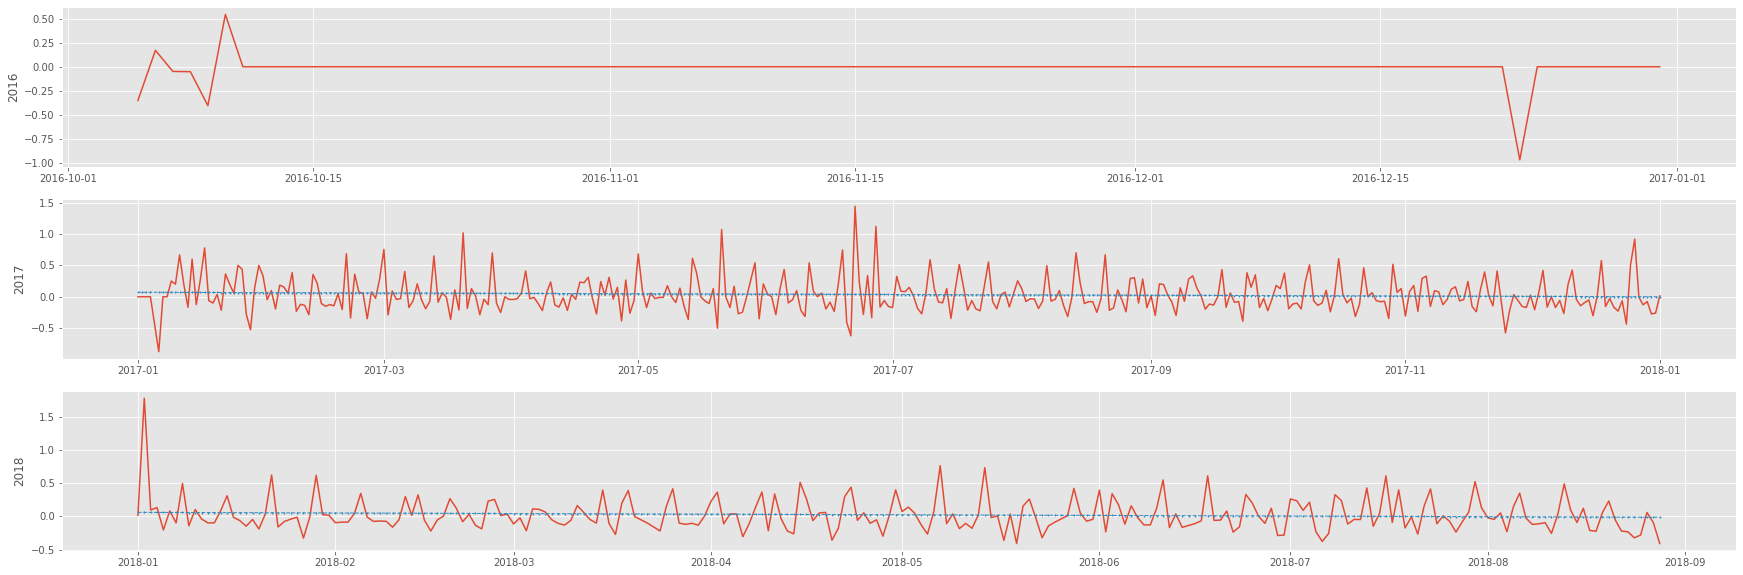

In [55]:
daily_purchase=daily_purchase[~(daily_purchase['Growth']>=2)]
fig, ax = plt.subplots(3,figsize=(30,10))
start_date=pd.DataFrame({'date':[date(2016,1,1)]})
end_date=pd.DataFrame({'date':[date(2016,12,31)]})
start_date['date']=pd.to_datetime(start_date['date'])
end_date['date']=pd.to_datetime(end_date['date'])

for i in range (0,3):
   limit=(daily_purchase['Date']>=start_date['date'][0])&(daily_purchase['Date']<=end_date['date'][0])
   x=daily_purchase['Date'][limit]
   y=daily_purchase['Growth'][limit]
   ax[i].plot(x,y)
   ax[i].set_ylabel(start_date['date'].dt.year[0])
   #add trendline
   daily_purchase['Date']=pd.to_datetime(daily_purchase['Date'])
   x = mdates.date2num(daily_purchase['Date'][limit])
   z = np.polyfit(x,y, 1)
   p = np.poly1d(z)
   ax[i].plot(x, p(x), "d--",lw=1,ms=1)
   if start_date['date'].dt.is_leap_year[0]==True :
     delta=timedelta(days=366)
   else:
     delta=timedelta(days=365)
   start_date=start_date+delta
   end_date+=delta

From two graph above, we can conclude the growth of daily order is not significantly increasing or decreasing but stagnant, it can be concluded from blue line which trendline. which the blue line coincide with y=0%

## Percentage of Orders per Payment Type

In [56]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96400 entries, 0 to 99440
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96400 non-null  object        
 1   customer_id               96400 non-null  object        
 2   order_status              96400 non-null  object        
 3   order_purchase_timestamp  96400 non-null  datetime64[ns]
 4   order_actual_time(days)   96400 non-null  float64       
 5   customer_unique_id        96400 non-null  object        
 6   customer_city             96400 non-null  object        
 7   customer_state            96400 non-null  object        
 8   total_payment_sequential  96400 non-null  float64       
 9   total_payment_value       96400 non-null  float64       
 10  payment_type              96400 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 8.8+ MB


In [57]:
type_payment_c=pd.DataFrame(combined.groupby('payment_type')['order_id'].count()).rename(columns={'order_id':'total_count'})
type_payment_c

,total_count
payment_type,
boleto,19156
credit_card,72090
"credit_card,debit_card",1
"credit_card,voucher",2180
debit_card,1476
voucher,1497


In [58]:
type_payment_c['total_count']['credit_card']=type_payment_c.loc['credit_card','total_count']+type_payment_c.loc['credit_card,debit_card','total_count']
type_payment_c['total_count']['debit_card']=type_payment_c.loc['debit_card','total_count']+type_payment_c.loc['credit_card,debit_card','total_count']
type_payment_c['total_count']['credit_card']=type_payment_c.loc['credit_card','total_count']+type_payment_c.loc['credit_card,voucher','total_count']
type_payment_c['total_count']['voucher']=type_payment_c.loc['voucher','total_count']+type_payment_c.loc['credit_card,voucher','total_count']
type_payment_c.drop(index=['credit_card,debit_card','credit_card,voucher'],inplace=True)
type_payment_c

,total_count
payment_type,
boleto,19156
credit_card,74271
debit_card,1477
voucher,3677


In [59]:
type_payment_c['in %']=type_payment_c['total_count']/type_payment_c['total_count'].sum()
type_payment_c

,total_count,in %
payment_type,,
boleto,19156,0.194317
credit_card,74271,0.753401
debit_card,1477,0.014983
voucher,3677,0.037299


(-1.103945997748616, 1.100187904654696, -1.104478012726866, 1.1042729003137841)

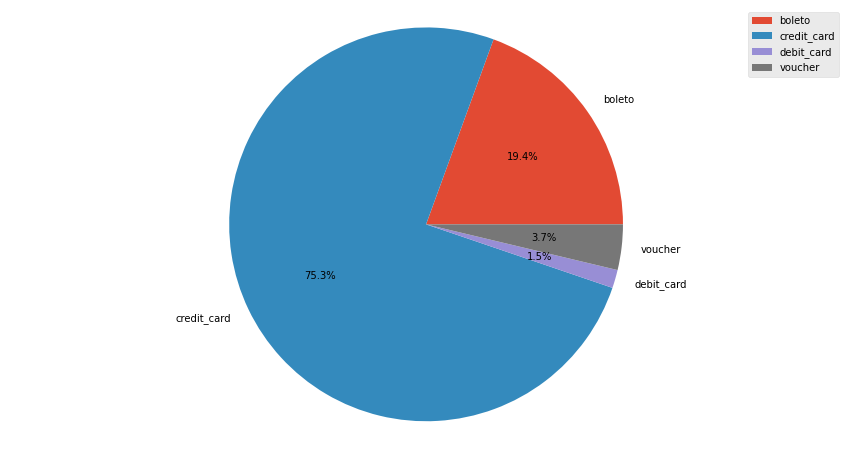

In [60]:
fig, ax = plt.subplots(figsize=(15,8))
ax.pie(x=type_payment_c['in %'],labels=type_payment_c.index.to_list(),autopct='%1.1f%%')
ax.legend()
ax.axis('equal')

From chart above we can conclude that many orders are using credit card as selected payment method and then followed with boleto, voucher and debit card

# Clustering

## Sorting and Cleaning Datasets

Convert the order_purchase into days and hour

In [65]:
df=combined_c.copy()
df['order_hour']=df['order_purchase_timestamp'].dt.strftime("%H")
df['order_weekdays']=df['order_purchase_timestamp'].dt.strftime("%A")
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_actual_time(days),customer_unique_id,customer_city,customer_state,total_payment_sequential,total_payment_value,payment_type,order_hour,order_weekdays
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,8.429144,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3.0,38.71,"credit_card,voucher",10,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,12.502292,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,141.46,boleto,20,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,9.382708,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,179.12,credit_card,08,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,13.196331,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,72.20,credit_card,19,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2.830938,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,28.62,credit_card,21,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99435,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,11.078437,831ce3f1bacbd424fc4e38fbd4d66d29,sao paulo,SP,1.0,155.99,credit_card,09,Thursday
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,8.218009,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,1.0,85.08,credit_card,09,Thursday
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,22.185637,da62f9e57a76d978d02ab5362c509660,praia grande,SP,1.0,195.00,credit_card,12,Tuesday
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,24.847234,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,1.0,271.01,credit_card,14,Sunday


add new column for indicate how much transaction customer was then aggregate for customer more than once transaction. where total payment in mean, total sequential in median, order hour in mode, and order week days in mode

In [66]:
df['number_of_order']=df.groupby('customer_unique_id')['customer_unique_id'].transform('count')
df['total_payment_sequential']=df.groupby('customer_unique_id')['total_payment_sequential'].transform('median')
df['total_payment_value']=df.groupby('customer_unique_id')['total_payment_value'].transform('mean')
df['order_hour']=df.groupby('customer_unique_id')['order_hour'].transform(lambda x: x.value_counts().idxmax())
df['order_weekdays']=df.groupby('customer_unique_id')['order_weekdays'].transform(lambda x: x.value_counts().idxmax())
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_actual_time(days),customer_unique_id,customer_city,customer_state,total_payment_sequential,total_payment_value,payment_type,order_hour,order_weekdays,number_of_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,8.429144,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2.0,41.41,"credit_card,voucher",10,Monday,2
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,12.502292,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,141.46,boleto,20,Tuesday,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,9.382708,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,179.12,credit_card,08,Wednesday,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,13.196331,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,72.20,credit_card,19,Saturday,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2.830938,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,28.62,credit_card,21,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99435,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,11.078437,831ce3f1bacbd424fc4e38fbd4d66d29,sao paulo,SP,1.0,155.99,credit_card,09,Thursday,1
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,8.218009,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,1.0,85.08,credit_card,09,Thursday,1
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,22.185637,da62f9e57a76d978d02ab5362c509660,praia grande,SP,1.0,195.00,credit_card,12,Tuesday,1
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,24.847234,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,1.0,271.01,credit_card,14,Sunday,1


drop duplicated value in column customer_unique_id

In [67]:
df.drop_duplicates(subset=['customer_unique_id'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86035 entries, 0 to 99440
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  86035 non-null  object        
 1   customer_id               86035 non-null  object        
 2   order_status              86035 non-null  object        
 3   order_purchase_timestamp  86035 non-null  datetime64[ns]
 4   order_actual_time(days)   86035 non-null  float64       
 5   customer_unique_id        86035 non-null  object        
 6   customer_city             86035 non-null  object        
 7   customer_state            86035 non-null  object        
 8   total_payment_sequential  86035 non-null  float64       
 9   total_payment_value       86035 non-null  float64       
 10  payment_type              86035 non-null  object        
 11  order_hour                86035 non-null  object        
 12  order_weekdays    

drop several columns transfrom categorical

In [68]:
df_cluster=df.copy()
df_cluster.drop(columns=['order_id','customer_id','order_status','customer_city','customer_state','order_actual_time(days)','order_purchase_timestamp','customer_unique_id'],inplace=True)
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86035 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_payment_sequential  86035 non-null  float64
 1   total_payment_value       86035 non-null  float64
 2   payment_type              86035 non-null  object 
 3   order_hour                86035 non-null  object 
 4   order_weekdays            86035 non-null  object 
 5   number_of_order           86035 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [69]:
# Get the position of categorical columns
catColumnsPos = [df_cluster.columns.get_loc(col) for col in list(df_cluster.select_dtypes('object').columns)]


Categorical columns           : ['payment_type', 'order_hour', 'order_weekdays']
Categorical columns position  : [2, 3, 4]


In [71]:
#standard scaling
for i in df_cluster.select_dtypes(exclude='object').columns:
    df_cluster.loc[:, i] = StandardScaler().fit_transform(np.array(df_cluster[[i]]))
df_cluster.head()

,total_payment_sequential,total_payment_value,payment_type,order_hour,order_weekdays,number_of_order
0,2.642497,-1.026910,"credit_card,voucher",10,Monday,4.707556
1,-0.122696,0.366314,boleto,20,Tuesday,-0.157835
2,-0.122696,0.890740,credit_card,08,Wednesday,-0.157835
3,-0.122696,-0.598151,credit_card,19,Saturday,-0.157835
4,-0.122696,-1.205015,credit_card,21,Tuesday,-0.157835


In [73]:
# Convert dataframe to matrix
dfMatrix = df_cluster.to_numpy()
dfMatrix

array([[2.642496915879153, -1.0269103422505073, 'credit_card,voucher',
        '10', 'Monday', 4.707555646313062],
       [-0.12269567885631005, 0.36631379695690114, 'boleto', '20',
        'Tuesday', -0.15783465245374742],
       [-0.12269567885631005, 0.8907397947834977, 'credit_card', '08',
        'Wednesday', -0.15783465245374742],
       ...,
       [-0.12269567885631005, 1.1118732213763378, 'credit_card', '12',
        'Tuesday', -0.15783465245374742],
       [-0.12269567885631005, 2.1703336593688927, 'credit_card', '14',
        'Sunday', -0.15783465245374742],
       [-0.12269567885631005, -0.39400642294039523, 'debit_card', '20',
        'Thursday', -0.15783465245374742]], dtype=object)

## Looking value of Cluster

### Using Elbow method

In [88]:
K = range(1,8)
cost = []
for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42)
    kproto.fit_predict(dfMatrix, categorical=catColumnsPos)
    cost.append(kproto.cost_)

KeyboardInterrupt: ignored

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

fig, ax = plt.subplots(figsize =(12, 8))

plt.plot(K, cost, 'bo-', color = '#FFC300')
plt.xlabel('k', color = 'white', size = 14)
plt.ylabel('Distortion', color = 'white', size = 14)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.text(2.4, 26800, "The", size=22, color="white")
plt.text(3.3, 26800,"Elbow Method", size=22, color="#FFC300")
plt.text(6.4, 26800, ": Optimal Number of", size=22, color="white")
plt.text(67000,2750,"Expenses", size=22, color="#FFC300")
plt.text(120000, -350, "@miguelfzzz", fontsize=12, ha="right", color='lightgray', fontweight="bold")
plt.text(10.9, 26800, "Clusters", size=22, color="#FFC300", fontweight="bold")
plt.text(14.65, 6900, "@miguelfzzz", fontsize=12, ha="right", color='lightgray', fontweight="bold")


plt.show()

## Clustering with KProto

In [ ]:
#reset number of cluster
number=0

In [75]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([1, 2, 0, ..., 0, 0, 2], dtype=uint16)

In [76]:
# Cluster centorid
kprototype.cluster_centroids_
# Check the iteration of the clusters created
kprototype.n_iter_
# Check the cost of the clusters created
kprototype.cost_

215229.88937922212

In [82]:
# Add the cluster to the dataframe
df['cluster'] = kprototype.labels_
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_actual_time(days),customer_unique_id,customer_city,customer_state,total_payment_sequential,total_payment_value,payment_type,order_hour,order_weekdays,number_of_order,cluster
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,8.429144,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2.0,41.41,"credit_card,voucher",10,Monday,2,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,12.502292,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,141.46,boleto,20,Tuesday,1,2
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,9.382708,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,179.12,credit_card,08,Wednesday,1,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,13.196331,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,72.20,credit_card,19,Saturday,1,2
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2.830938,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,28.62,credit_card,21,Tuesday,1,2


## interpreting order hour

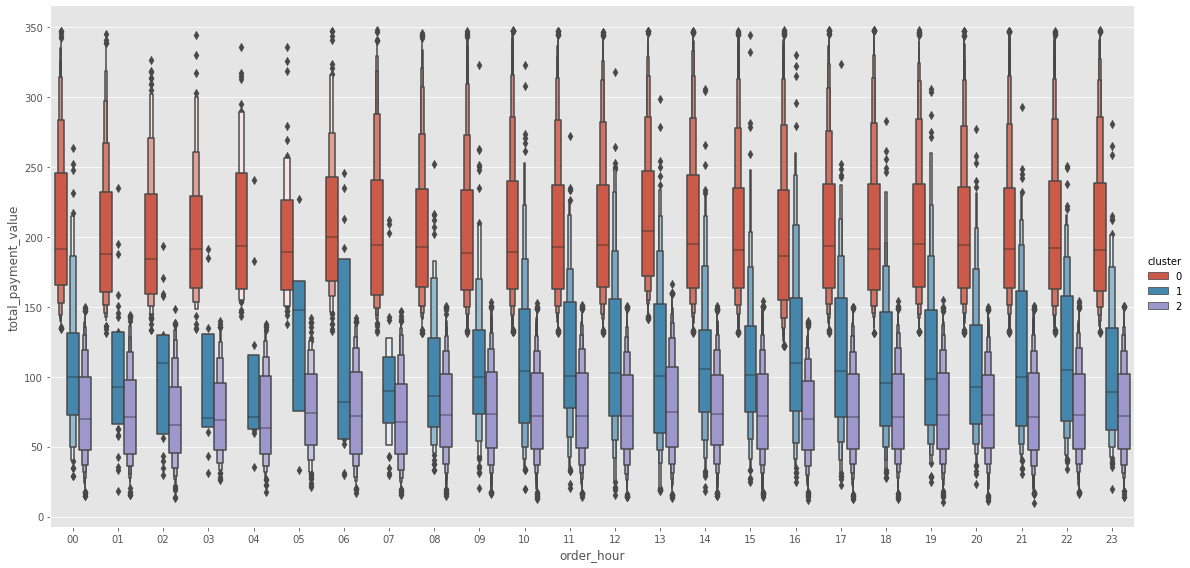

In [83]:
d=df.sort_values(by='order_hour')
ax=sns.catplot(x='order_hour',y='total_payment_value',data=d,hue='cluster',height=8,aspect=2,kind='boxen')

In [ ]:
df.groupby(['cluster','order_hour']).agg({'order_hour':'count','total_payment_value':['min','max','mean'],'total_payment_sequential':['min','max'],'number_of_order':['min','max']})

order_hour total_payment_value                      \
                        count                 min     max        mean   
cluster order_hour                                                      
0       16               5801               11.63  347.84  117.813064   
        17               5329               12.89  347.74  115.818062   
        18               4950               12.28  347.84  114.864727   
        19               5199               10.07  347.76  116.997102   
        20               5360               10.89  347.06  115.726905   
        21               5427                9.59  347.50  114.729721   
        22               5092               16.38  347.41  116.248083   
        23               3604               13.78  347.89  115.129341   
1       07               1067               15.38  347.89  109.297982   
        08               2591               14.78  346.09  114.645078   
        09               4090               16.36  347.26  114.930250   
        10               5344               12.39  347.79  115.576858   
        11               5724               14.13  347.32  114.901090   
        12               5120               13.78  346.59  115.996560   
        13               5642               13.29  347.24  113.871615   
        14               5615               14.78  347.31  115.670038   
        15               5538               13.78  347.08  113.848316   
2       00               2091               14.62  347.52  114.687393   
        01               1000               15.38  345.18  107.277175   
        02                448               13.39  326.34  106.448047   
        03                229               26.05  344.32  111.086936   
        04                183               17.69  335.47  105.227832   
        05                164               21.24  335.58  110.688902   
        06                427               16.84  347.00  110.051116   

                   total_payment_sequential       number_of_order      
                                        min   max             min max  
cluster order_hour                                                     
0       16                              1.0  19.0               1   3  
        17                              1.0  14.0               1   6  
        18                              1.0  11.0               1   4  
        19                              1.0   8.0               1   5  
        20                              1.0  11.0               1   7  
        21                              1.0  11.0               1   4  
        22                              1.0  12.0               1  15  
        23                              1.0  11.0               1   4  
1       07                              1.0   7.0               1   6  
        08                              1.0   8.0               1   3  
        09                              1.0  11.0               1   5  
        10                              1.0  13.0               1   8  
        11                              1.0  13.0               1   7  
        12                              1.0  26.0               1   3  
        13                              1.0  12.0               1   7  
        14                              1.0  19.0               1   6  
        15                              1.0   6.0               1   4  
2       00                              1.0  15.0               1   3  
        01                              1.0   4.0               1   4  
        02                              1.0   3.0               1   2  
        03                              1.0   4.0               1   3  
        04                              1.0   3.0               1   6  
        05                              1.0   4.0               1   4  
        06                              1.0   6.0               1   4

## interpreting order payment

In [84]:
df.groupby(['cluster','payment_type']).agg({'payment_type':'count','total_payment_value':['min','max','mean'],'total_payment_sequential':['min','max'],'number_of_order':['min','max']})

payment_type total_payment_value              \
                                      count                 min         max   
cluster payment_type                                                          
0       boleto                         4415              122.02  347.190000   
        credit_card                   19766              121.64  347.890000   
        credit_card,voucher             511              135.16  346.380000   
        debit_card                      336              131.71  347.890000   
        voucher                         201              133.69  341.020000   
1       boleto                          465               15.62  330.220000   
        credit_card                    1882               17.97  344.510000   
        credit_card,voucher              73               20.09  305.586667   
        debit_card                       33               20.35  282.940000   
        voucher                          62               24.68  196.236667   
2       boleto                        12537               12.28  158.610000   
        credit_card                   42272               10.07  160.180000   
        credit_card,debit_card            1              152.82  152.820000   
        credit_card,voucher            1381                9.59  166.250000   
        debit_card                      990               13.38  149.680000   
        voucher                        1110               12.39  154.750000   

                                           total_payment_sequential        \
                                      mean                      min   max   
cluster payment_type                                                        
0       boleto                  203.461443                      1.0   1.0   
        credit_card             206.976253                      1.0   2.0   
        credit_card,voucher     210.359922                      2.0  19.0   
        debit_card              203.803899                      1.0   2.0   
        voucher                 198.950448                      1.0  12.0   
1       boleto                  111.630807                      1.0   6.5   
        credit_card             113.498745                      1.0   2.0   
        credit_card,voucher      99.445468                      1.0   8.0   
        debit_card              105.980909                      1.0   1.5   
        voucher                  87.644516                      1.0  16.5   
2       boleto                   72.844693                      1.0   2.0   
        credit_card              77.001544                      1.0   2.0   
        credit_card,debit_card  152.820000                      3.0   3.0   
        credit_card,voucher      78.388530                      2.0  26.0   
        debit_card               70.851253                      1.0   3.0   
        voucher                  66.170847                      1.0  15.0   

                               number_of_order      
                                           min max  
cluster payment_type                                
0       boleto                               1   1  
        credit_card                          1   1  
        credit_card,voucher                  1   1  
        debit_card                           1   1  
        voucher                              1   1  
1       boleto                               2   7  
        credit_card                          2  15  
        credit_card,voucher                  2   4  
        debit_card                           2   2  
        voucher                              2   3  
2       boleto                               1   1  
        credit_card                          1   1  
        credit_card,debit_card               1   1  
        credit_card,voucher                  1   1  
        debit_card                           1   1  
        voucher                              1   1

## interpreting weekdays

In [ ]:
df.groupby(['cluster','order_weekdays']).agg({'order_weekdays':'count','total_payment_value':['min','max','mean'],'total_payment_sequential':['min','max'],'number_of_order':['min','max']})

order_weekdays total_payment_value                      \
                                count                 min     max        mean   
cluster order_weekdays                                                          
0       Friday                   5117               13.78  347.76  116.546831   
        Monday                   6721               12.89  347.89  117.105975   
        Saturday                 4559                9.59  347.84  115.022659   
        Sunday                   5835               11.63  347.77  114.903716   
        Thursday                 5803               10.89  347.74  115.701583   
        Tuesday                  6575               14.08  347.56  117.048714   
        Wednesday                6152               10.07  347.83  115.079599   
1       Friday                   6253               14.13  347.89  114.560771   
        Monday                   6663               14.65  347.42  114.918259   
        Saturday                 4201               14.39  347.26  116.716014   
        Sunday                   4099               13.38  347.41  114.486032   
        Thursday                 6287               12.39  347.06  114.498281   
        Tuesday                  6676               13.29  347.08  114.454469   
        Wednesday                6552               13.78  347.79  114.440340   
2       Friday                    791               14.62  347.32  107.337082   
        Monday                    591               13.39  336.94  110.730606   
        Saturday                  610               17.29  347.00  111.004230   
        Sunday                    523               15.38  347.52  114.263983   
        Thursday                  688               19.64  344.32  112.258258   
        Tuesday                   611               15.38  346.90  113.601173   
        Wednesday                 728               13.68  345.18  110.103826   

                       total_payment_sequential       number_of_order      
                                            min   max             min max  
cluster order_weekdays                                                     
0       Friday                              1.0  19.0               1   4  
        Monday                              1.0  14.0               1   7  
        Saturday                            1.0  11.0               1   4  
        Sunday                              1.0  11.0               1   4  
        Thursday                            1.0   9.0               1   6  
        Tuesday                             1.0   7.0               1  15  
        Wednesday                           1.0  12.0               1   5  
1       Friday                              1.0  22.0               1   4  
        Monday                              1.0  13.0               1   8  
        Saturday                            1.0  19.0               1   5  
        Sunday                              1.0   8.0               1   5  
        Thursday                            1.0  16.5               1   7  
        Tuesday                             1.0  12.0               1   4  
        Wednesday                           1.0  26.0               1   7  
2       Friday                              1.0  15.0               1   4  
        Monday                              1.0   4.0               1   3  
        Saturday                            1.0   7.0               1   6  
        Sunday                              1.0   6.0               1   3  
        Thursday                            1.0   6.0               1   3  
        Tuesday                             1.0   7.0               1   3  
        Wednesday                           1.0   5.0               1   3

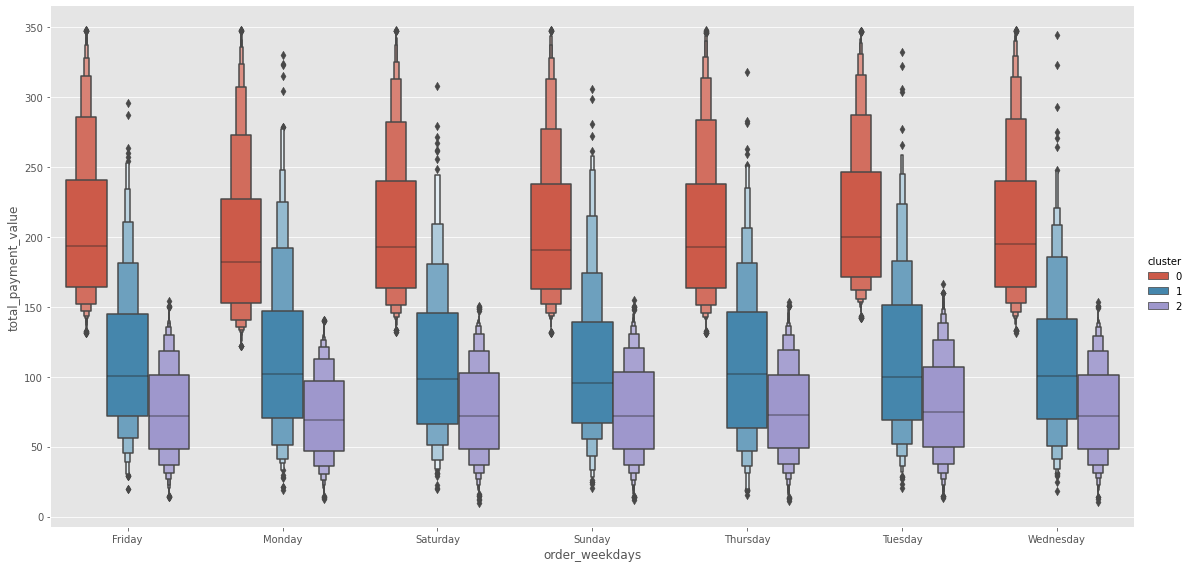

In [85]:
d=df.sort_values(by='order_weekdays')
ax=sns.catplot(x='order_weekdays',y='total_payment_value',data=d,hue='cluster',height=8,aspect=2,kind='boxen')

## interpreting total Payment, sequence 

In [87]:
df.groupby(['cluster']).agg({'payment_type':'count','total_payment_value':['min','max','mean','median'],'total_payment_sequential':['min','max'],'number_of_order':['min','max']})

payment_type total_payment_value                              \
               count                 min     max        mean  median   
cluster                                                                
0              25229              121.64  347.89  206.323515  192.56   
1               2515               15.62  344.51  112.009469  100.03   
2              58291                9.59  166.25   75.830968   72.14   

        total_payment_sequential       number_of_order      
                             min   max             min max  
cluster                                                     
0                            1.0  19.0               1   1  
1                            1.0  16.5               2  15  
2                            1.0  26.0               1   1

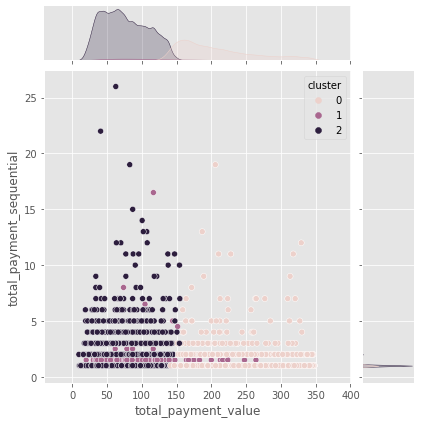

In [86]:
sns.jointplot(data=df, x="total_payment_value", y="total_payment_sequential", hue="cluster")

In [ ]:
sns.catplot(x="total_payment_value", y="cluster", hue="cluster", kind="violin", data=df)

Error in callback <function flush_figures at 0x7f577544a290> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
# export file
#file_name="output_cluster_"+str(number)+".xlsx"
#agg_cluster.to_excel(file_name)
#files.download(file_name)